# Continut
## [1. Importul si explorarea datelor](#date)
## [2. Procesarea datelor](#procesare)
## [3. Elaborarea dendogramei](#dendograma)
## [4. Elaborarea modelului Hierarchical Agglomerative](#model)
## [5. Determinarea numarului de clustere](#clustere)

<a id='date'></a>
# 1. Importul si explorarea datelor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importul datelor
df = pd.read_csv('cluster_mpg.csv')

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
# vizualizarea informației despre date df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [5]:
# vizualizarea informatiei statistice despre df df.describe()
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
# vizualizarea numarului de date in colonale categoriale df[col].value_counts()
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [7]:
# excluderea coloanei name
X = df.drop('name',axis=1)

In [8]:
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa
388,44.0,4,97.0,52.0,2130,24.6,82,europe
389,32.0,4,135.0,84.0,2295,11.6,82,usa
390,28.0,4,120.0,79.0,2625,18.6,82,usa


<a id='procesare'></a>
# 2. Procesarea datelor

In [9]:
# conversia datelor coloanei origin in valori numerice X = pd.get_dummies(X)
X = pd.get_dummies(X)

In [10]:
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [11]:
# importul modului de scalare MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Crearea unui obiect de scalarea scaler = MinMaxScaler()
scaler = MinMaxScaler()

In [13]:
# Scalarea datelor X X_scalat = scaler.fit_transform(X)
X_scalat = scaler.fit_transform(X)

In [14]:
X_scalat

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [15]:
# formarea unui df cu datele scalate pd.DataFrame(X_scalat,columns=X.columns)
df_scalat = pd.DataFrame(X_scalat,columns=X.columns)

In [16]:
df_scalat

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<a id='dendograma'></a>
# 3. Elaborarea dendogramei

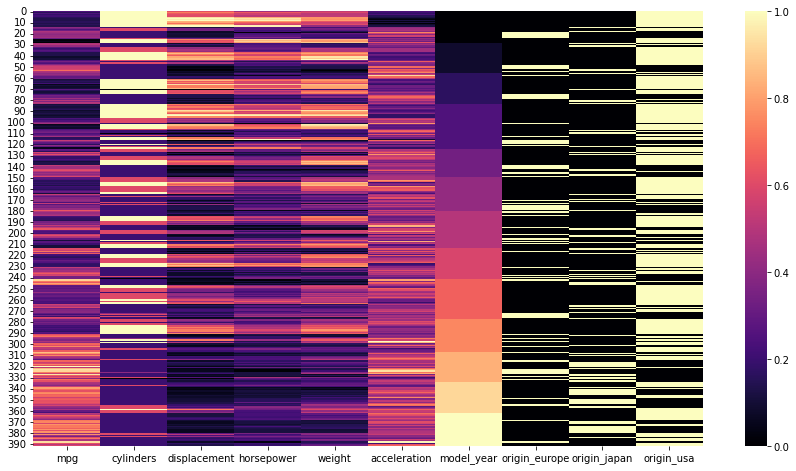

In [17]:
# Vizualizarea datelor cu ajutorul heatmap sns.heatmap(df_scalat);
plt.figure(figsize=(15,8))
sns.heatmap(df_scalat,cmap='magma');

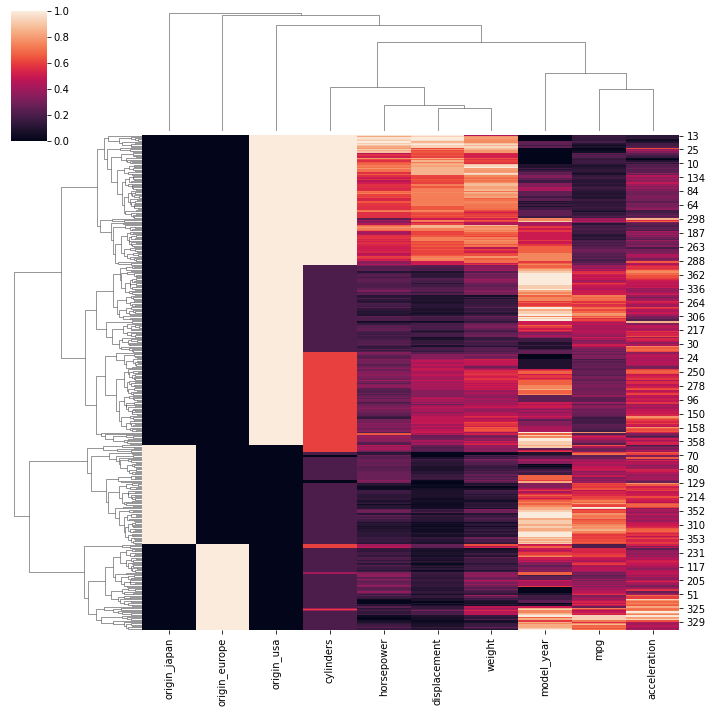

In [18]:
# Elaborarea dendogramei cu ajutorul clustermap
sns.clustermap(df_scalat)

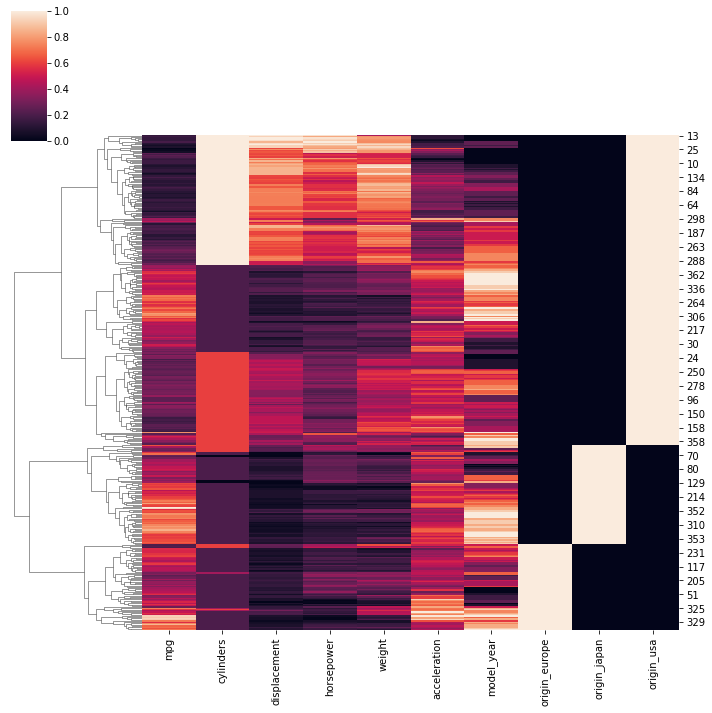

In [19]:
# Elaborarea dendogramei doar pe linii cu ajutorul clustermap sns.clustermap(df_scalat,col_cluster=False)
sns.clustermap(df_scalat,col_cluster=False)

<a id='model'></a>
# 4. Elaborarea modelului Hierarchical Agglomerative

In [20]:
# importul modulului AgglomerativeClustering from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [21]:
# crearea modelului pentru 4 clustere model = AgglomerativeClustering(n_clusters=4)
model = AgglomerativeClustering(n_clusters=4)

In [22]:
# Ajustarea modelului și determinarea clusterului fiecarei date cluster_labels = model.fit_predict(X_scalat)
cluster_labels = model.fit_predict(X_scalat)

In [23]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<AxesSubplot:xlabel='mpg', ylabel='weight'>

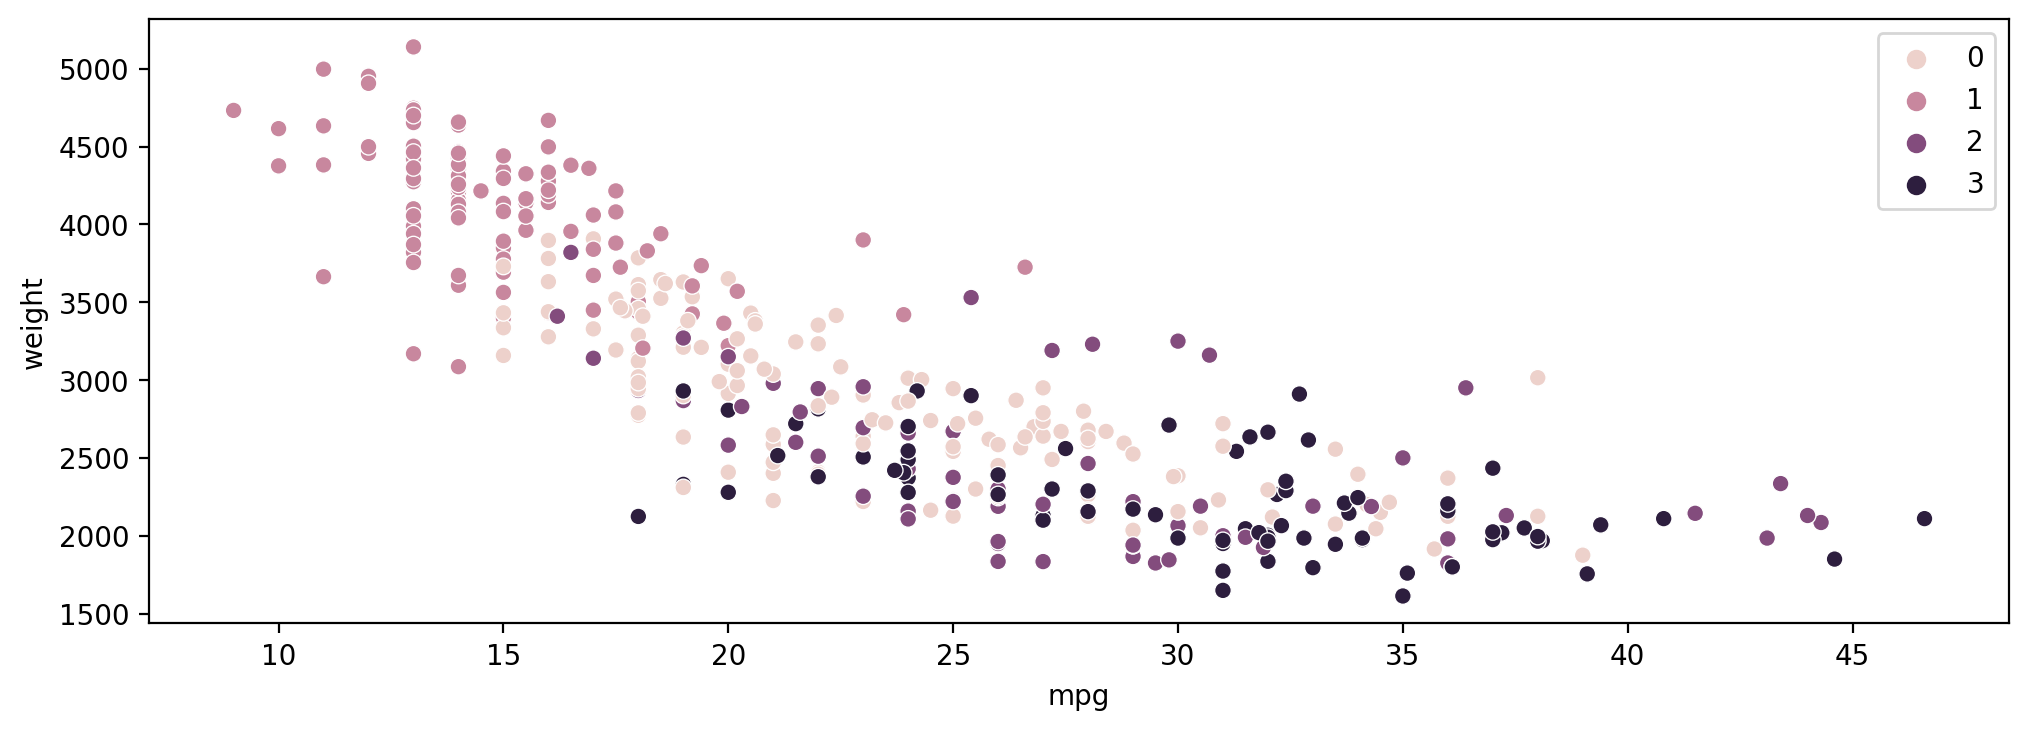

In [24]:
# vizualizarea depdendetelor din datele originale in functie de clustere sns.scatterplot(data=df,x=col1,y=col2,hue=cluster_labels)
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels)

In [25]:
# Vizualizarea numarului de clustere model.n_clusters_
model.n_clusters_

4

In [26]:
# Vizualizarea numarului de frunze in ierarhie model.n_leaves_
model.n_leaves_

392

In [27]:
# Vizualizarea punctelor de unificare in ierarhie model.children_
model.children_

array([[ 67,  68],
       [232, 234],
       [ 63,  74],
       [127, 143],
       [250, 258],
       [ 34,  36],
       [283, 286],
       [  6,   7],
       [ 86, 114],
       [363, 390],
       [141, 146],
       [ 60,  79],
       [252, 257],
       [249, 260],
       [ 46, 397],
       [ 96,  98],
       [ 17,  24],
       [150, 174],
       [ 80,  83],
       [159, 160],
       [206, 213],
       [128, 130],
       [377, 379],
       [334, 335],
       [367, 386],
       [155, 157],
       [185, 186],
       [147, 148],
       [362, 401],
       [ 95, 123],
       [285, 288],
       [  2,   4],
       [374, 375],
       [ 35,  47],
       [ 85,  88],
       [365, 366],
       [180, 184],
       [ 18,  29],
       [179, 196],
       [ 41,  43],
       [173, 195],
       [336, 382],
       [104, 105],
       [175, 177],
       [231, 238],
       [140, 145],
       [341, 345],
       [188, 211],
       [333, 351],
       [125, 167],
       [197, 225],
       [278, 282],
       [ 39,

In [28]:
# crearea modelului pentru 2 clustere model = AgglomerativeClustering(n_clusters=2)
model = AgglomerativeClustering(n_clusters=2)

In [29]:
# Ajustarea modelului și determinarea clusterului fiecarei date cluster_labels = model.fit_predict(X_scalat)
cluster_labels = model.fit_predict(X_scalat)

In [30]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,

<AxesSubplot:xlabel='mpg', ylabel='weight'>

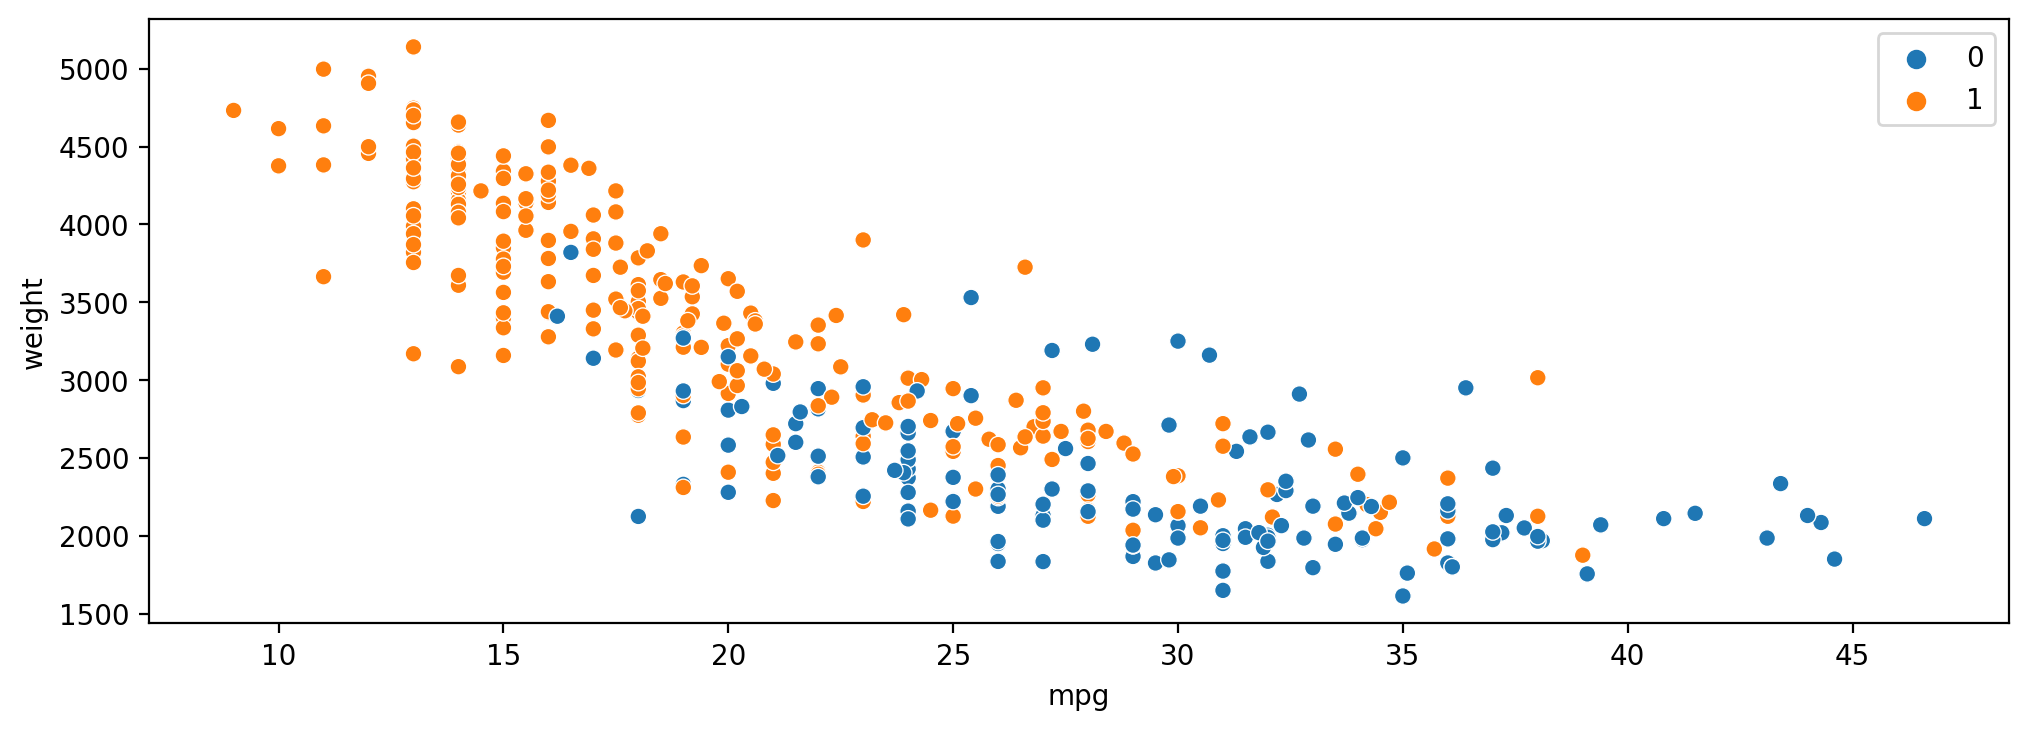

In [31]:
# vizualizarea depdendetelor din datele originale in functie de clustere sns.scatterplot(data=df,x=col1,y=col2,hue=cluster_labels)
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels)

<a id='clustere'></a>
# 5. Determinarea numarului de clustere

In [32]:
# Distanta minima la care punctele nu se vor uni in claster dis_min=0
dis_min=0

In [33]:
# Distanta maxima teoretica dintre puncte care va permite includera tuturor punctelor intr-un cluster dis_max=np.sqrt(num_caracteristici)
dis_max=np.sqrt(len(df_scalat.columns))
dis_max

3.1622776601683795

In [34]:
# crearea modelului cu setarea 0 a distantei care nu uneste puncte in cluster (fiecare punct va fi un cluster)
# model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=dis_min)

In [35]:
# Ajustarea modelului și determinarea clusterului fiecarei date cluster_labels = model.fit_predict(X_scalat)
cluster_labels = model.fit_predict(X_scalat)

In [36]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [ ]:
# Vizualizarea numarului de clustere n_clusters_
model.n_clusters_

In [41]:
# importul modulelor scipy pentru determinarea distantelor intr-o erarhie  from scipy.cluster.hierarchy import linkage
# info https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
from scipy.cluster.hierarchy import linkage

In [42]:
# determinarea matricei cu distante ce include indicile primului, celui de al doilea, 
# distante dintre ele si numarul de puncte in clusterul format linkage_matrix = linkage(model.children_)
linkage_matrix = linkage(model.children_)

In [43]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

In [44]:
# importul modulelor scipy pentru explorarea dendogramei from scipy.cluster.hierarchy import dendrogram
# info https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
from scipy.cluster.hierarchy import dendrogram

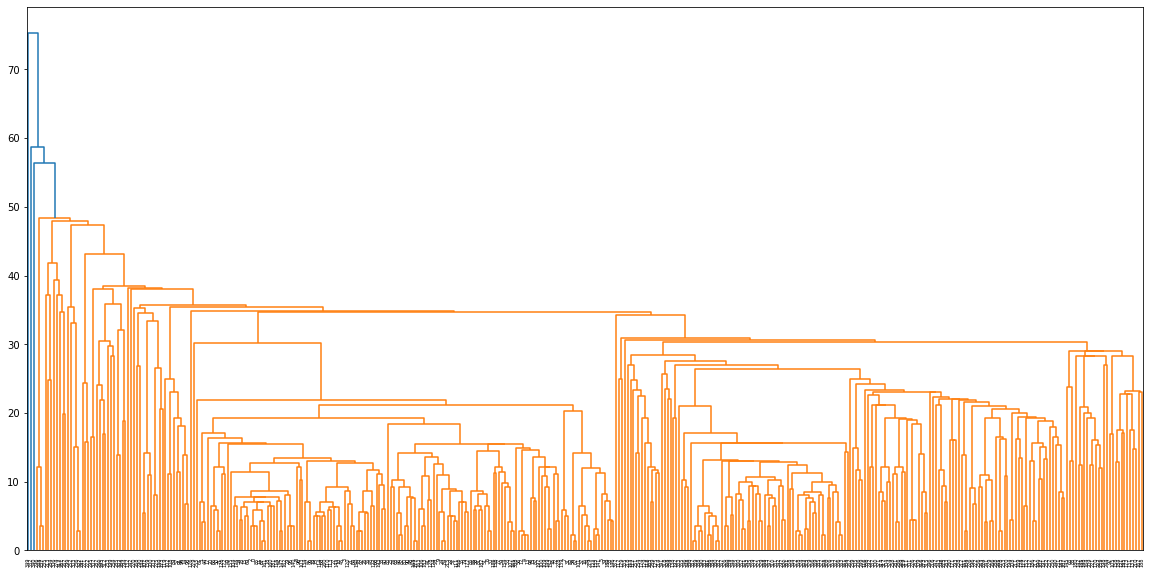

In [45]:
# Elaborarea dendogramei hierarchy.dendrogram(linkage_matrix)
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix)

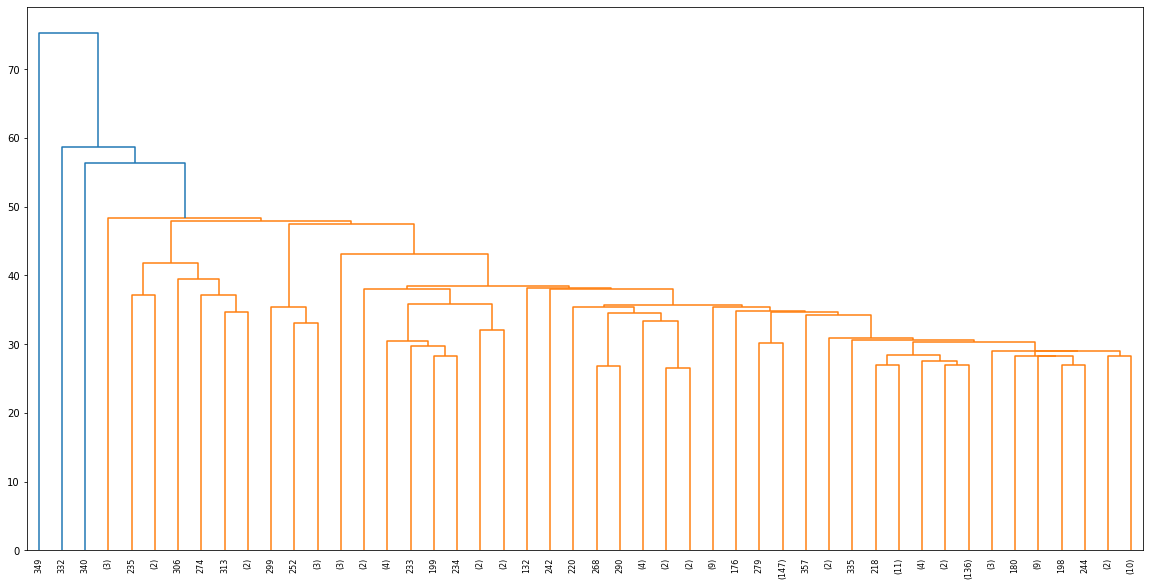

In [46]:
# trucarea dendogramei conform numarului de puncte frunze egal cu 48 hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)

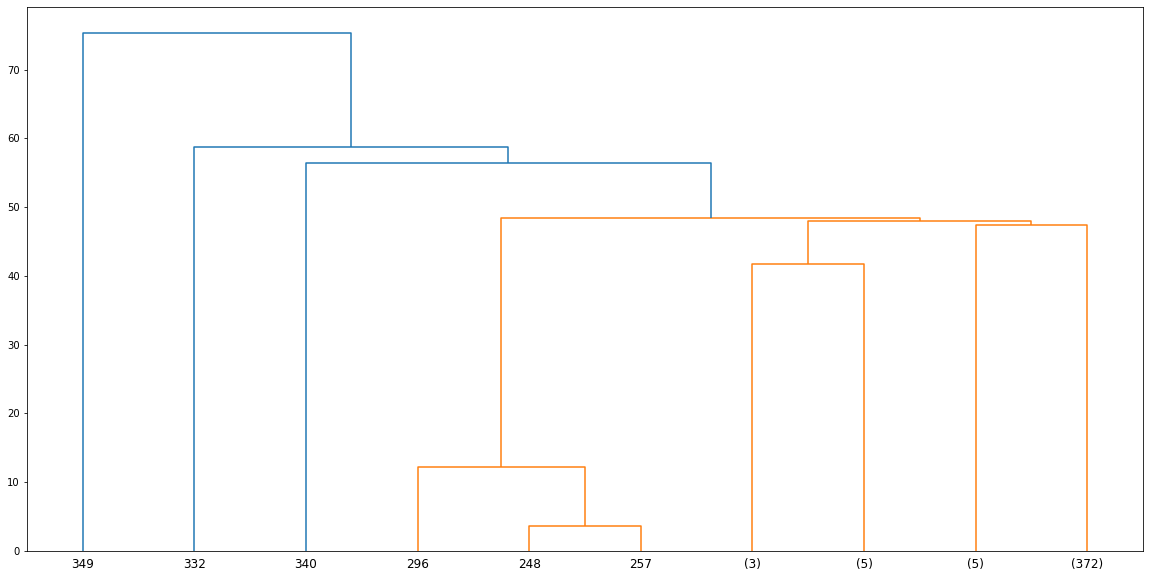

In [51]:
# trucarea dendogramei conform numarului nivele egal cu 5 hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=5)
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=5)

In [52]:
# crearea modelului cu setarea 2 a distantei care nu uneste puncte in cluster 
# model = AgglomerativeClustering(n_clusters=None,distance_threshold=2)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=2)

In [53]:
# Ajustarea modelului și determinarea clusterului fiecarei date cluster_labels = model.fit_predict(X_scalat)
cluster_labels = model.fit_predict(X_scalat)

In [54]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

In [60]:
# Determinarea numarului de clustere nr_cluster = model.n_clusters_
nr_cluster = model.n_clusters_
nr_cluster

11

In [56]:
# Determinarea matricea cu distante linkage_matrix = linkage(model.children_)
linkage_matrix = linkage(model.children_)

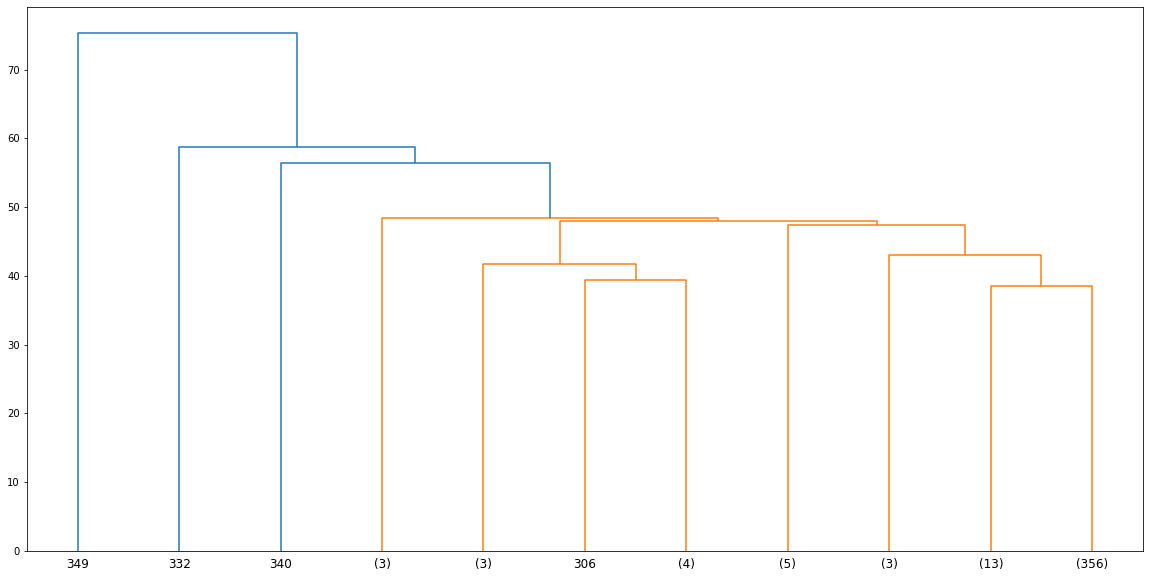

In [61]:
# Elaborarea dendogramei trucate la numarul de clustere hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=nr_cluster)
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=nr_cluster)